## 数据介绍
* titanic数据集是一份记录泰坦尼克号乘客信息的数据，记录了每一位乘客的年龄、性别、舱位、票价等信息，并对乘客是否从泰坦尼克号海难中存活进行标记
* 字段说明 
    * PassengerId：乘客id
    * Survived： 是否生还，0-否，1-是
    * Pclass：船票等级 1-头等舱 2-二等舱 3-三等舱
    * Name：乘客姓名
    * Sex：乘客性别
    * Age：乘客年龄
    * SibSp：船上兄弟姐妹及配偶的个数
    * Parch：船上父母及子女的个数
    * Ticket：船票编号
    * Fare：船票费用
    * Cabin:	船舱号码
    * Embarked: 登船码头 C = Cherbourg, Q = Queenstown, S = Southampton
* 分析目的：挖掘与乘客存活率有关的因素

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 载入数据
train_titanic_df = pd.read_csv("../kaggle_titanic-master/train.csv")
# test_titanic_df = pd.read_csv("../kaggle_titanic-master/test.csv")
# titanic_df = pd.concat([train_titanic_df,test_titanic_df])
titanic_df = train_titanic_df

In [3]:
# 取出前6行数据查看
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 基本统计特性

In [4]:
# 查看数值型数据
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 乘客年龄有较多缺失值，需考虑缺失值填充
* python会将能解析成数字的数据识别为数值型，需注意到“Survived”“Pclass”是类别型

In [5]:
# 查看类别型数据
titanic_df.describe(include = [np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Yousseff, Mr. Gerious",male,CA. 2343,G6,S
freq,1,577,7,4,644


* 船舱号码数据缺失值达到70%以上，考虑去除此列数据
* 登船码头有两个缺失值，需进行缺失值填充

## 缺失值处理

In [6]:
# 删除数据船舱号码数据
del titanic_df["Cabin"]
# 填充缺失的年龄数据，使用均值填充
titanic_df.Age.fillna(titanic_df["Age"].mean(), inplace = True)
# 填充缺失的登船口岸信息，使用众数填充
titanic_df.Embarked.fillna("S",inplace = True)

In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_df.describe(include = [np.object])

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Yousseff, Mr. Gerious",male,CA. 2343,S
freq,1,577,7,646


## 单变量分析

### 乘客存活率分布

In [9]:
# 乘客存活率分布
(titanic_df.groupby("Survived").size().to_frame()/891).reset_index().rename(columns = {0:"rate"})

,Survived,rate
0,0,0.616162
1,1,0.383838


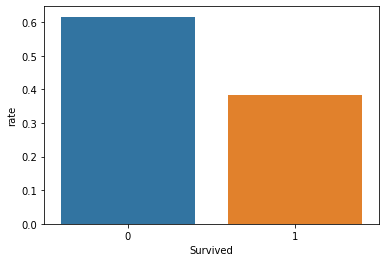

In [10]:
sns.barplot(data=(titanic_df.groupby("Survived").size().to_frame()/891).reset_index().rename(columns = {0:"rate"}),x="Survived",y="rate")

* 泰坦尼克号海难乘客存活率：38%

### 仓位乘客数量分布

In [11]:
# 仓位乘客数量分布
titanic_df.groupby("Pclass").size().to_frame().reset_index().rename(columns = {0:"number"})

,Pclass,number
0,1,216
1,2,184
2,3,491


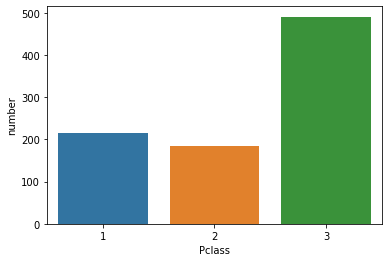

In [12]:
sns.barplot(data=titanic_df.groupby("Pclass").size().to_frame().reset_index().rename(columns = {0:"number"}),x="Pclass",y="number")

* 头等舱和二等舱人数接近
* 三等舱人数最多，三等舱人数占乘客总数50%以上

### 乘客性别分布

In [13]:
# 乘客性别分布
titanic_df.groupby("Sex").size().to_frame().reset_index().rename(columns = {0:"number"})

,Sex,number
0,female,314
1,male,577


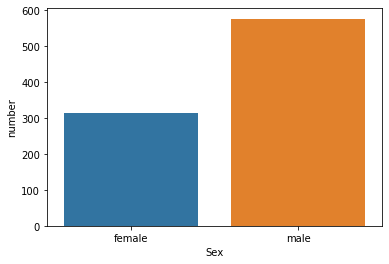

In [14]:
sns.barplot(data=titanic_df.groupby("Sex").size().to_frame().reset_index().rename(columns = {0:"number"}),x="Sex",y="number")

* 乘客中男性人数远多于女性

### 乘客登船口岸分布

In [15]:
titanic_df.groupby("Embarked").size().to_frame().reset_index().rename(columns = {0:"number"})

,Embarked,number
0,C,168
1,Q,77
2,S,646


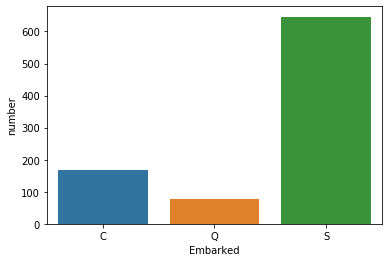

In [16]:
sns.barplot(data=titanic_df.groupby("Embarked").size().to_frame().reset_index().rename(columns = {0:"number"}),x="Embarked",y="number")

* Southampton码头登船人数最多，达到646人
* Queenstown码头登船人数最少，只有77人

### 乘客年龄分布

In [17]:
# 乘客年龄分布分段统计(连续变量离散化)
titanic_df["Age_cut"] = pd.cut(titanic_df["Age"],10)
titanic_df.groupby("Age_cut").size().to_frame().reset_index().rename(columns = {0:"number"})

,Age_cut,number
0,"(0.34, 8.378]",54
1,"(8.378, 16.336]",46
2,"(16.336, 24.294]",177
3,"(24.294, 32.252]",346
4,"(32.252, 40.21]",118
5,"(40.21, 48.168]",70
6,"(48.168, 56.126]",45
7,"(56.126, 64.084]",24
8,"(64.084, 72.042]",9
9,"(72.042, 80.0]",2


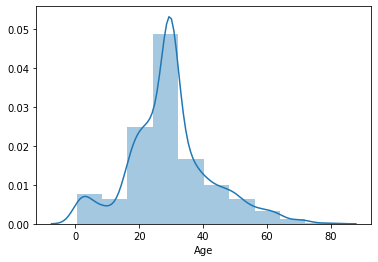

In [18]:
# 乘客年龄分布图形绘制
sns.distplot(titanic_df["Age"],bins=10)

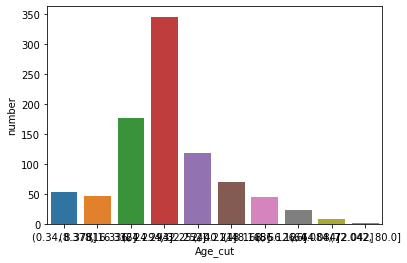

In [19]:
# 绘制分割好的各年龄段人数分布图
sns.barplot(data = titanic_df.groupby("Age_cut").size().to_frame().reset_index().rename(columns = {0:"number"}), x = "Age_cut", y = "number")

* 乘客中青壮年人数多，老人和小孩人数占比少
* 年龄分布基本符合正态分布

### 乘客票价分布

In [20]:
# 乘客票价分布
titanic_df["Fare_cut"] = pd.cut(titanic_df["Fare"],10)
titanic_df.groupby("Fare_cut").size().to_frame().reset_index().rename(columns = {0:"number"})

,Fare_cut,number
0,"(-0.512, 51.233]",732
1,"(51.233, 102.466]",106
2,"(102.466, 153.699]",31
3,"(153.699, 204.932]",2
4,"(204.932, 256.165]",11
5,"(256.165, 307.398]",6
6,"(307.398, 358.63]",0
7,"(358.63, 409.863]",0
8,"(409.863, 461.096]",0
9,"(461.096, 512.329]",3


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

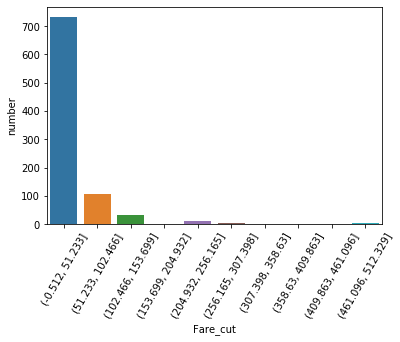

In [21]:
sns.barplot(data = titanic_df.\
            groupby("Fare_cut").size().to_frame().reset_index().rename(columns = {0:"number"}), x = "Fare_cut", y = "number")
plt.xticks(rotation=60)

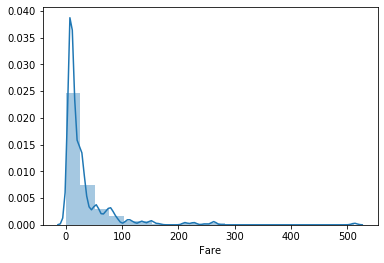

In [22]:
sns.distplot(titanic_df["Fare"], bins=20)

* 低价票占据票价的大部分
* 乘客票价总体呈现长尾分布

## 与生还率相关的离散值单因素

### 舱位与生还率

In [23]:
# 计算各舱位生还率
titanic_df.pivot_table(values="Survived", index = "Pclass", aggfunc=np.mean)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


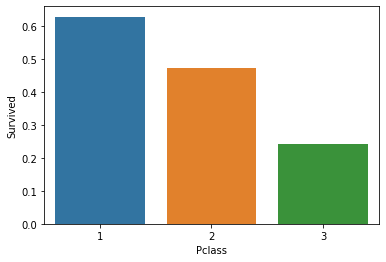

In [24]:
# 绘制各舱位乘客生还率柱状图
sns.barplot(data=titanic_df, x = "Pclass", y = "Survived",ci=None)

* 一等舱生还率最高，三等舱生还率最低

### 性别与生还率

In [25]:
# 分别计算男乘客与女乘客的生还率
titanic_df.pivot_table(values="Survived", index = "Sex", aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


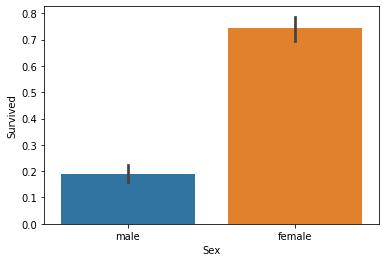

In [26]:
# 绘制男女生还率柱状图
sns.barplot(data=titanic_df, x = "Sex", y = "Survived")

* 女性乘客的生还率远高于男性

## 与生还率相关的连续型单因素

### 年龄与生还率是否有关

In [27]:
# 计算各年龄段的乘客的生还率
titanic_df.pivot_table(values="Survived", index = "Age_cut", aggfunc=np.mean)

,Survived
Age_cut,
"(0.34, 8.378]",0.666667
"(8.378, 16.336]",0.413043
"(16.336, 24.294]",0.355932
"(24.294, 32.252]",0.338150
"(32.252, 40.21]",0.440678
"(40.21, 48.168]",0.342857
"(48.168, 56.126]",0.466667
"(56.126, 64.084]",0.375000
"(64.084, 72.042]",0.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

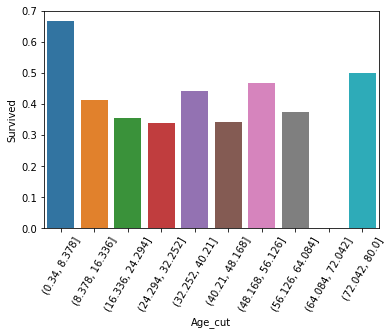

In [30]:
# 绘制各年龄段乘客生还率柱状图（将连续值转化为连续值呈现）
sns.barplot(data=titanic_df, x="Age_cut", y="Survived", ci= None)
plt.xticks(rotation=60)

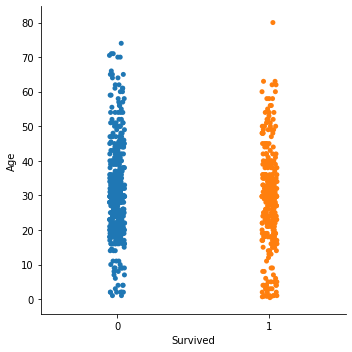

In [55]:
# 绘制分类散点图，使用抖动效果
sns.catplot(data=titanic_df, x="Survived",  y="Age", jitter = 0.05, ci=None)

* 婴儿孩童有明细较高的生还率
* 除婴儿孩童外，其他年龄段的乘客的生还率都在50%以下

### 票价与生还率

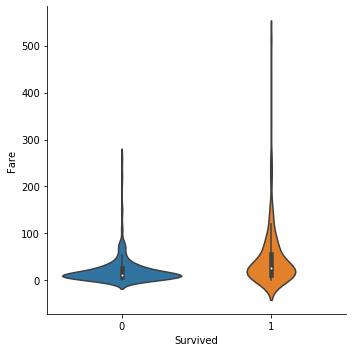

In [71]:
# 绘制票价与是否生还分类散点图,使用蜂群效果
sns.catplot(data=titanic_df, x="Survived", y="Fare", ci= None, kind="violin")

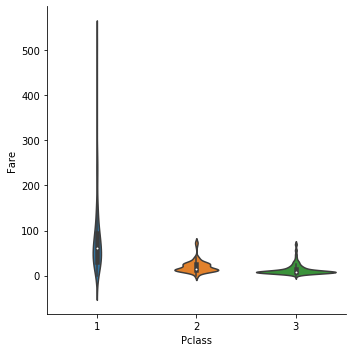

In [70]:
# 票价与舱位可行存在相关
sns.catplot(data=titanic_df, x="Pclass", y="Fare", kind="violin")

* 高价票的乘客存活率较高
* 本质上还是反应头等舱的乘客存活率高

## 与生还率相关的多因素综合分析

### 综合考虑舱位与年龄和是否生还的关系
    * 我们知道这场海难中一等舱存活率更高，一定程度反映了穷人受到歧视，同时老幼乘客在海难中也得到更多的生存机会，体现了尊老爱幼的道德价值观
    * 此分析可协助反映在执行道德标准时，是否受到钱权的干扰

In [62]:
# 计算各舱位各年龄段的乘客生还率
titanic_df.pivot_table(values="Survived", index="Pclass", columns="Age_cut", aggfunc=np.mean)

Age_cut,"(0.34, 8.378]","(8.378, 16.336]","(16.336, 24.294]","(24.294, 32.252]","(32.252, 40.21]","(40.21, 48.168]","(48.168, 56.126]","(56.126, 64.084]","(64.084, 72.042]","(72.042, 80.0]"
Pclass,,,,,,,,,,
1,0.666667,1.000000,0.766667,0.576271,0.761905,0.555556,0.592593,0.437500,0.0,1.0
2,1.000000,0.500000,0.459459,0.396552,0.441176,0.466667,0.416667,0.200000,0.0,NaN
3,0.500000,0.305556,0.209091,0.262009,0.119048,0.071429,0.000000,0.333333,0.0,0.0


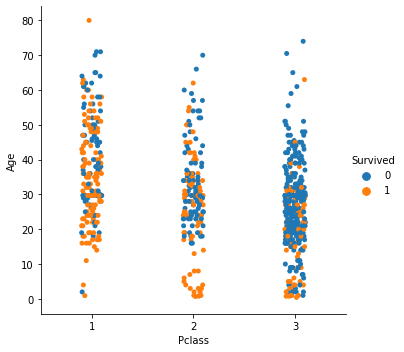

In [73]:
# 绘制图形协助分析
sns.catplot(data=titanic_df, x="Pclass", y="Age", hue="Survived")

* 我们看到存活率上 一等舱>二等舱>三等舱
* 我们还发现在各个年龄段都存在富人得到更多生存机会的情况

### 综合考虑舱位与性别和是否生还的关系
    * 与上文类似，我们试图探究在女士优先的道德准则是否也受到金钱的影响

In [64]:
# 计算各舱位各性别的乘客生还率
titanic_df.pivot_table(values="Survived", index="Pclass", columns="Sex", aggfunc=np.mean)

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


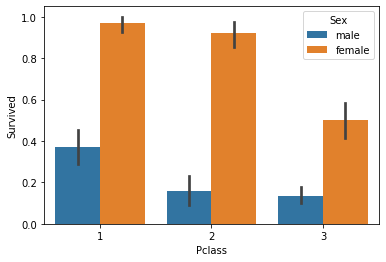

In [65]:
# 绘制图形协助分析
sns.barplot(x=titanic_df.Pclass, y=titanic_df.Survived, hue=titanic_df.Sex)

* 一等舱女性存活率最低
* 一等舱和二等舱女性存活率都达到90%以上
* 三等舱女性存活率远低于一等舱和二等舱

In [69]:
import math
math.sqrt(2560*2560+1440*1440)

2937.2095601097312